___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#### *ii. Load Dataset*

In [2]:
df = pd.read_csv('treetypes.csv')

In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,...,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7


#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [5]:
df.shape

(250000, 55)

In [8]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', '

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [10]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,2748.505160,156.212172,16.331052,228.094032,50.897820,1719.966576,212.370488,218.510700,134.502764,1521.756904,...,0.041580,0.039880,0.001500,0.006464,0.000396,0.001852,0.046020,0.041388,0.026892,4.000320
std,418.300975,109.652847,8.317490,209.630153,61.006967,1330.817603,30.654582,22.680947,46.033892,1107.378373,...,0.199628,0.195678,0.038701,0.080139,0.019896,0.042995,0.209529,0.199186,0.161768,2.001108
min,1859.000000,0.000000,0.000000,0.000000,-163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2375.000000,65.000000,10.000000,66.000000,5.000000,756.000000,195.000000,206.000000,106.000000,734.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2753.000000,125.000000,15.000000,180.000000,32.000000,1318.000000,220.000000,222.000000,137.000000,1273.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3108.000000,260.000000,22.000000,330.000000,79.000000,2294.000000,235.000000,235.000000,167.000000,1998.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3857.000000,360.000000,65.000000,1390.000000,598.000000,7112.000000,254.000000,254.000000,252.000000,7150.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


<AxesSubplot:xlabel='Aspect'>

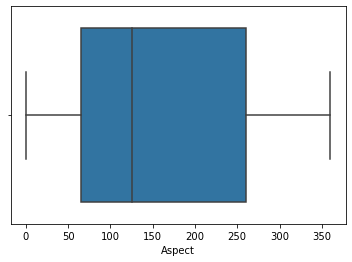

In [22]:
sns.boxplot(df.Aspect)

<AxesSubplot:xlabel='Elevation'>

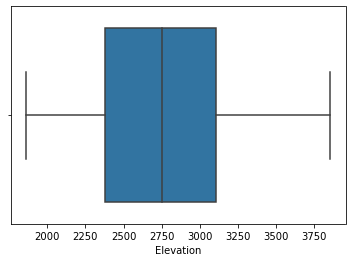

In [18]:
sns.boxplot(df.Elevation)

<AxesSubplot:xlabel='Slope'>

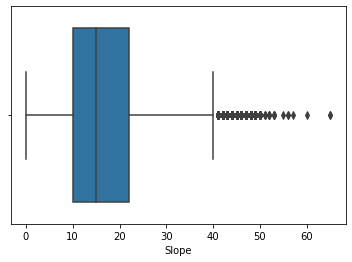

In [23]:
sns.boxplot(df.Slope)

<AxesSubplot:xlabel='Slope', ylabel='Count'>

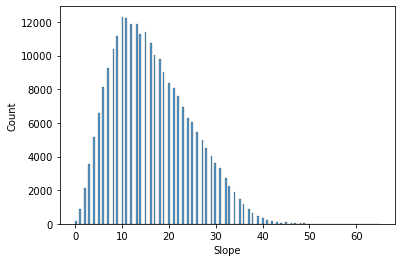

In [7]:
sns.histplot(data = df, x = 'Slope')

In [8]:
df[df.Slope > 45].Slope

589       49
5740      49
6071      46
6491      48
6531      47
          ..
242016    48
243603    52
246616    47
248059    49
248414    47
Name: Slope, Length: 172, dtype: int64

In [50]:
len(df[df.Slope > 40].Slope)/len(df)

0.0034

<AxesSubplot:xlabel='Vertical_Distance_To_Hydrology'>

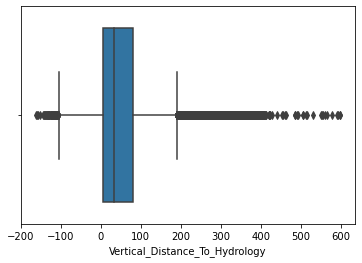

In [25]:
sns.boxplot(df.Vertical_Distance_To_Hydrology)

<AxesSubplot:xlabel='Vertical_Distance_To_Hydrology', ylabel='Count'>

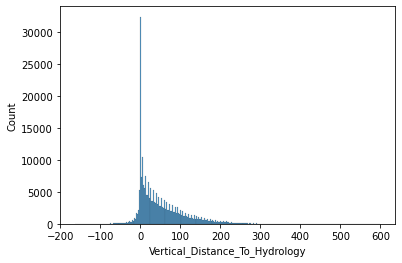

In [10]:
sns.histplot(data = df, x ='Vertical_Distance_To_Hydrology' )

In [11]:
df[df.Vertical_Distance_To_Hydrology > 250].Vertical_Distance_To_Hydrology

119       257
172       270
368       313
460       332
601       396
         ... 
249627    263
249673    281
249728    282
249908    265
249999    311
Name: Vertical_Distance_To_Hydrology, Length: 2484, dtype: int64

In [51]:
len(df[df.Vertical_Distance_To_Hydrology > 200].Vertical_Distance_To_Hydrology) / len(df)

0.029796

<AxesSubplot:xlabel='Horizontal_Distance_To_Hydrology'>

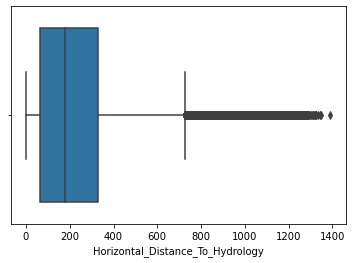

In [26]:
sns.boxplot(df.Horizontal_Distance_To_Hydrology)

<AxesSubplot:xlabel='Horizontal_Distance_To_Hydrology', ylabel='Count'>

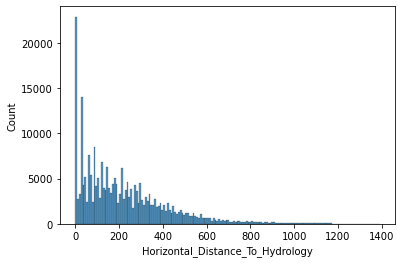

In [12]:
sns.histplot(data = df, x = 'Horizontal_Distance_To_Hydrology')

In [13]:
df[df.Horizontal_Distance_To_Hydrology > 800].Horizontal_Distance_To_Hydrology

65        1088
119       1130
151       1055
173       1153
180        932
          ... 
249913    1205
249925    1073
249951    1069
249992     857
249999    1112
Name: Horizontal_Distance_To_Hydrology, Length: 5955, dtype: int64

In [53]:
len(df[df.Horizontal_Distance_To_Hydrology > 750].Horizontal_Distance_To_Hydrology)/len(df)

0.029552

<AxesSubplot:xlabel='Horizontal_Distance_To_Roadways'>

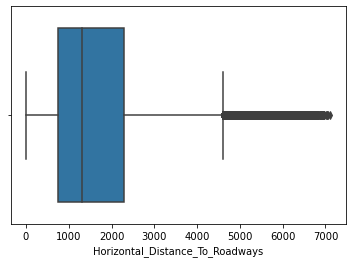

In [27]:
sns.boxplot(df.Horizontal_Distance_To_Roadways)

<AxesSubplot:xlabel='Horizontal_Distance_To_Roadways', ylabel='Count'>

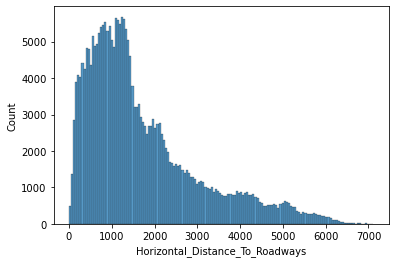

In [14]:
sns.histplot(data = df, x = 'Horizontal_Distance_To_Roadways')

In [15]:
df[df.Horizontal_Distance_To_Roadways > 6000].Horizontal_Distance_To_Roadways

178       6016
490       6174
674       6376
901       6363
955       6634
          ... 
249196    6507
249418    6311
249485    6012
249745    6335
249821    6747
Name: Horizontal_Distance_To_Roadways, Length: 1186, dtype: int64

In [55]:
len(df[df.Horizontal_Distance_To_Roadways > 4550].Horizontal_Distance_To_Roadways) / len(df)

0.053208

<AxesSubplot:xlabel='Hillshade_9am'>

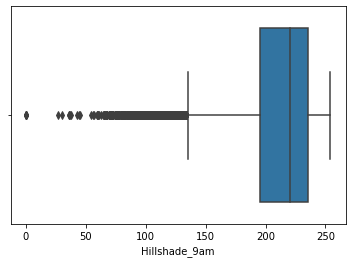

In [28]:
sns.boxplot(df.Hillshade_9am)

<AxesSubplot:xlabel='Hillshade_9am', ylabel='Count'>

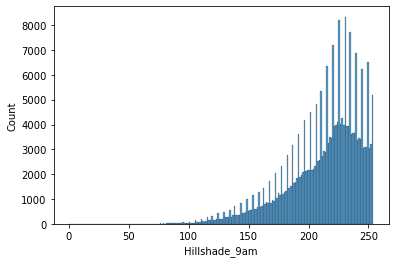

In [16]:
sns.histplot(data = df, x = 'Hillshade_9am')

In [19]:
df[df.Hillshade_9am < 100].Hillshade_9am

855       92
1026      88
1433      70
1718      86
2087      86
          ..
249231    85
249400    94
249650    79
249790    94
249903    84
Name: Hillshade_9am, Length: 585, dtype: int64

In [57]:
len(df[df.Hillshade_9am < 140].Hillshade_9am) / len(df)

0.029196

<AxesSubplot:xlabel='Hillshade_Noon'>

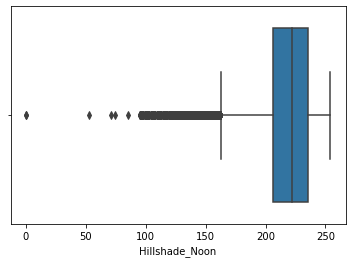

In [29]:
sns.boxplot(df.Hillshade_Noon)

<AxesSubplot:xlabel='Hillshade_Noon', ylabel='Count'>

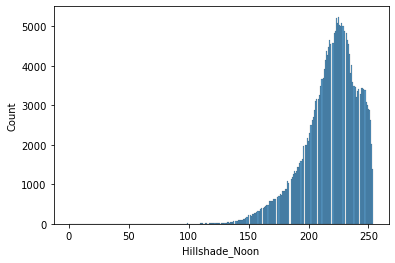

In [20]:
sns.histplot(data = df, x = 'Hillshade_Noon')

In [21]:
df[df.Hillshade_Noon < 120].Hillshade_Noon

589       100
3411      116
3591      109
6071      110
6491      110
         ... 
241381    117
242016    111
246955    111
247533    114
248414    116
Name: Hillshade_Noon, Length: 206, dtype: int64

In [59]:
len(df[df.Hillshade_Noon < 160].Hillshade_Noon) / len(df)

0.018932

<AxesSubplot:xlabel='Hillshade_3pm'>

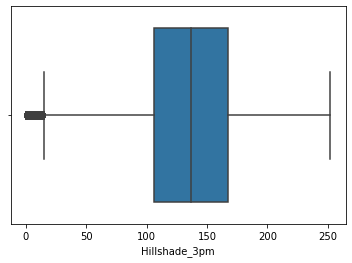

In [30]:
sns.boxplot(df.Hillshade_3pm)

<AxesSubplot:xlabel='Horizontal_Distance_To_Fire_Points'>

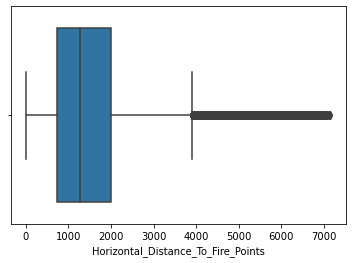

In [31]:
sns.boxplot(df.Horizontal_Distance_To_Fire_Points)

In [17]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,...,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2112,339,39,49,17,467,107,151,162,435,...,0,0,0,0,0,0,0,0,0,3
249996,2872,90,31,251,147,2027,248,172,27,508,...,0,0,0,0,0,0,0,0,0,5
249997,2336,57,5,0,0,1429,224,228,139,387,...,0,0,0,0,0,0,0,0,0,4
249998,2563,181,10,0,0,1349,223,246,156,1007,...,0,0,0,0,0,0,0,0,0,5


***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [9]:
def remove_outliers(df, col, whis=1.5):
    q1 = df.groupby("Cover_Type")[col].quantile(0.25)
    q3 = df.groupby("Cover_Type")[col].quantile(0.75)
    iqr = q3 - q1
    for i in np.sort(df.Cover_Type.unique()):
        min_threshold = q1.loc[i] - whis*iqr.loc[i]
        max_threshold = q3.loc[i] + whis*iqr.loc[i]
        df.loc[((df["Cover_Type"]==i) & ((df[col]<min_threshold) | (df[col]>max_threshold))), col] = np.nan
    return sns.boxplot(y = df[col], x = df["Cover_Type"], whis=whis)

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Hydrology'>

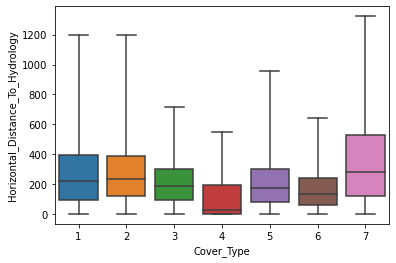

In [29]:
remove_outliers(df, "Horizontal_Distance_To_Hydrology", whis=3)

In [23]:
list_out = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']

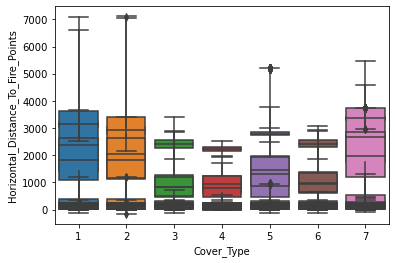

In [25]:
for i in list_out:
    remove_outliers(df, i, whis=3)  

In [34]:
df.dropna(inplace=True)

In [35]:
df.isnull().sum().sum()

0

In [36]:
df.shape

(246736, 55)

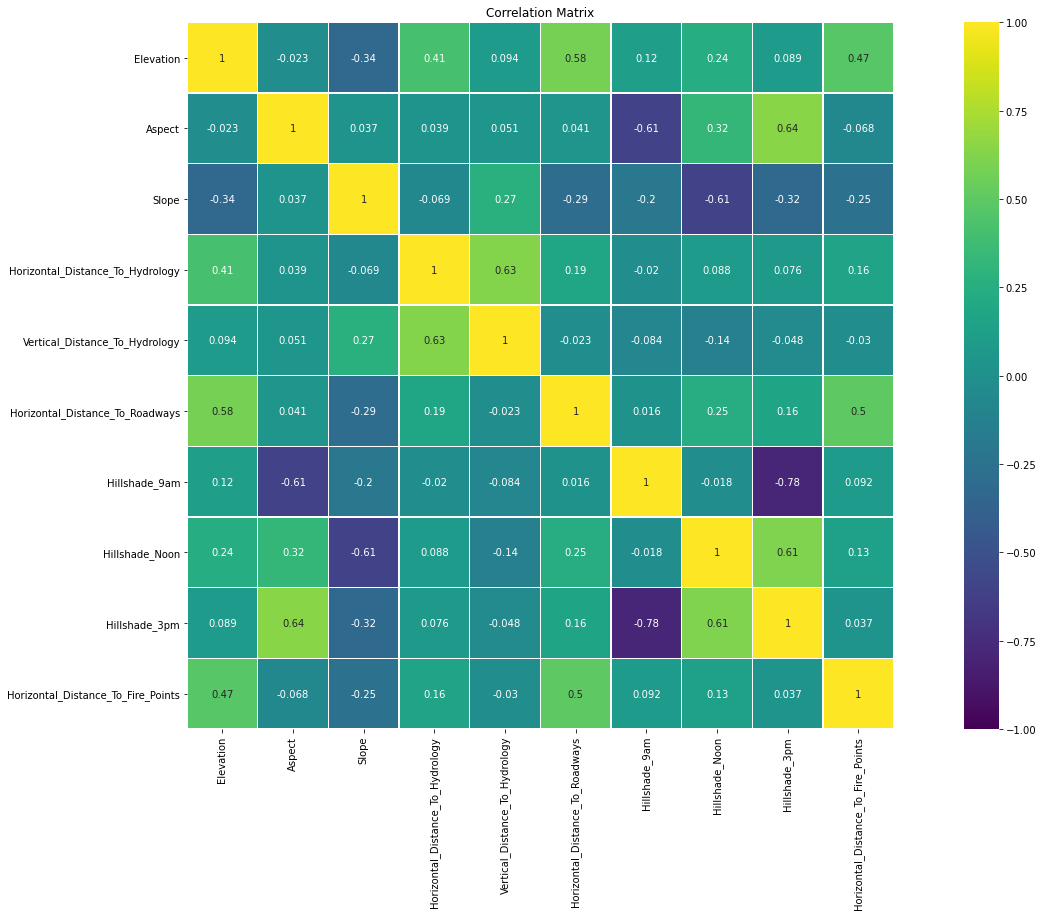

In [37]:
corr_matrix = df[df.columns[:10]].corr()
plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix, square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

### Deal with Outliers

#### *ii. Drop Outliers*

### Now, let's take a closer look at correlation of continuous columns.

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [38]:
df['Hypotenuse'] = np.sqrt(df.Horizontal_Distance_To_Hydrology **2 + df.Vertical_Distance_To_Hydrology**2)

In [44]:
df['Average_Dist_Hydr_Road'] = (df.Horizontal_Distance_To_Roadways + df.Horizontal_Distance_To_Hydrology)/2

In [46]:
df['Average_Dist_Elev_Hyrd'] = (df.Elevation + df.Vertical_Distance_To_Hydrology)/2

In [47]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Hypotenuse,Average_Dist_Hydr_Road,Average_Dist_Elev_Hyrd
0,2696.0,123.0,10.0,212.0,48.0,2245.0,237.0,231.0,123.0,2113.0,...,0,0,0,0,0,0,6,217.366051,1228.5,1372.0
1,3269.0,110.0,19.0,134.0,40.0,3734.0,249.0,216.0,88.0,3960.0,...,0,0,0,1,0,0,1,139.842769,1934.0,1654.5
2,3283.0,322.0,18.0,346.0,104.0,4369.0,170.0,217.0,185.0,1330.0,...,0,0,0,1,0,0,7,361.292126,2357.5,1693.5
3,2847.0,89.0,31.0,270.0,175.0,1320.0,248.0,173.0,29.0,889.0,...,0,0,0,0,0,0,5,321.753011,795.0,1511.0
4,3248.0,93.0,12.0,507.0,118.0,570.0,239.0,221.0,110.0,945.0,...,0,0,0,0,0,0,7,520.550670,538.5,1683.0


In [48]:
df1 = df

In [49]:
df1.drop(['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology' ], axis = 1, inplace = True)

In [50]:
df1

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,...,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Hypotenuse,Average_Dist_Hydr_Road,Average_Dist_Elev_Hyrd
0,2696.0,123.0,10.0,2245.0,237.0,231.0,123.0,2113.0,0,0,...,0,0,0,0,0,0,6,217.366051,1228.5,1372.0
1,3269.0,110.0,19.0,3734.0,249.0,216.0,88.0,3960.0,1,0,...,0,0,0,1,0,0,1,139.842769,1934.0,1654.5
2,3283.0,322.0,18.0,4369.0,170.0,217.0,185.0,1330.0,1,0,...,0,0,0,1,0,0,7,361.292126,2357.5,1693.5
3,2847.0,89.0,31.0,1320.0,248.0,173.0,29.0,889.0,0,0,...,0,0,0,0,0,0,5,321.753011,795.0,1511.0
4,3248.0,93.0,12.0,570.0,239.0,221.0,110.0,945.0,0,0,...,0,0,0,0,0,0,7,520.550670,538.5,1683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2112.0,339.0,39.0,467.0,107.0,151.0,162.0,435.0,0,0,...,0,0,0,0,0,0,3,51.865210,258.0,1064.5
249996,2872.0,90.0,31.0,2027.0,248.0,172.0,27.0,508.0,0,0,...,0,0,0,0,0,0,5,290.877981,1139.0,1509.5
249997,2336.0,57.0,5.0,1429.0,224.0,228.0,139.0,387.0,0,0,...,0,0,0,0,0,0,4,0.000000,714.5,1168.0
249998,2563.0,181.0,10.0,1349.0,223.0,246.0,156.0,1007.0,0,0,...,0,0,0,0,0,0,5,0.000000,674.5,1281.5


***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
# plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [55]:
X = df1.drop('Cover_Type', axis = 1)
y = df1.Cover_Type

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [68]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
svc_model = LinearSVC()

In [71]:
svc_model.fit(X_train, y_train)

LinearSVC()

In [72]:
y_pred = svc_model.predict(X_test)

In [73]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [74]:
eval_metric(svc_model, X_train,y_train, X_test, y_test )

Test_Set
[[ 8866    59     0    73   134   898   517]
 [ 6307   373     3   747   354  2686    56]
 [  134     3   276  4389    13  5845     1]
 [    0     0     0 10503     0   182     0]
 [ 1810   179    33   621  3263  4360    44]
 [   22     1    14  2915     3  7753     0]
 [ 4957     0     0     0    20     9  5598]]
              precision    recall  f1-score   support

           1       0.40      0.84      0.54     10547
           2       0.61      0.04      0.07     10526
           3       0.85      0.03      0.05     10661
           4       0.55      0.98      0.70     10685
           5       0.86      0.32      0.46     10310
           6       0.36      0.72      0.48     10708
           7       0.90      0.53      0.67     10584

    accuracy                           0.49     74021
   macro avg       0.65      0.49      0.42     74021
weighted avg       0.64      0.49      0.42     74021


Train_Set
[[20662   136     0   203   366  2198  1218]
 [14833   874     7  1

# with scaling 

In [75]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [76]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
svc_model.fit(X_train_scaled, y_train)

LinearSVC()

In [78]:
y_pred = svc_model.predict(X_test_scaled)

In [80]:
svm_scaled = eval_metric(svc_model, X_train_scaled,y_train, X_test_scaled, y_test )

Test_Set
[[6965 1540    7    0  587  110 1338]
 [2555 5167  248    7 2013  473   63]
 [   0   42 5432 1465  698 3024    0]
 [   0    0  588 9642    0  455    0]
 [ 316 1311  810    0 7260  613    0]
 [   1  293 1768 1145 1141 6360    0]
 [1083    5    4    0   53    0 9439]]
              precision    recall  f1-score   support

           1       0.64      0.66      0.65     10547
           2       0.62      0.49      0.55     10526
           3       0.61      0.51      0.56     10661
           4       0.79      0.90      0.84     10685
           5       0.62      0.70      0.66     10310
           6       0.58      0.59      0.59     10708
           7       0.87      0.89      0.88     10584

    accuracy                           0.68     74021
   macro avg       0.67      0.68      0.67     74021
weighted avg       0.67      0.68      0.67     74021


Train_Set
[[16012  3917    26     0  1518   247  3063]
 [ 6114 12176   548    14  4478  1164   181]
 [    0    90 12635  3530 

In [82]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [83]:
svc_scade_acc = accuracy_score(y_test, y_pred)

In [84]:
svc_scade_acc

0.679064049391389

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
DT_model = DecisionTreeClassifier(random_state=101)

In [87]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [88]:
y_pred = DT_model.predict(X_test)

In [89]:
eval_metric(DT_model, X_train,y_train, X_test, y_test )

Test_Set
[[ 9067  1215     6     0    34     3   222]
 [ 1292  8685   121     1   294   112    21]
 [    3   103 10003    97    27   428     0]
 [    0     0    52 10590     0    43     0]
 [   29   122    32     0 10111    16     0]
 [    5    92   366    47    29 10169     0]
 [  134    12     0     0     0     0 10438]]
              precision    recall  f1-score   support

           1       0.86      0.86      0.86     10547
           2       0.85      0.83      0.84     10526
           3       0.95      0.94      0.94     10661
           4       0.99      0.99      0.99     10685
           5       0.96      0.98      0.97     10310
           6       0.94      0.95      0.95     10708
           7       0.98      0.99      0.98     10584

    accuracy                           0.93     74021
   macro avg       0.93      0.93      0.93     74021
weighted avg       0.93      0.93      0.93     74021


Train_Set
[[24783     0     0     0     0     0     0]
 [    0 24675     0   

In [94]:
dt_no_scal = accuracy_score(y_test, y_pred)

In [95]:
dt_no_scal

0.9330190081193175

# with scaling

In [90]:
DT_model.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=101)

In [92]:
y_pred_scaled = DT_model.predict(X_test_scaled)

In [93]:
eval_metric(DT_model, X_train_scaled,y_train, X_test_scaled, y_test )

Test_Set
[[ 9066  1218     6     0    33     3   221]
 [ 1289  8687   121     1   295   112    21]
 [    3   103 10011    94    25   425     0]
 [    0     0    52 10591     0    42     0]
 [   29   120    33     0 10112    16     0]
 [    5    94   365    47    29 10168     0]
 [  136    12     0     0     0     0 10436]]
              precision    recall  f1-score   support

           1       0.86      0.86      0.86     10547
           2       0.85      0.83      0.84     10526
           3       0.95      0.94      0.94     10661
           4       0.99      0.99      0.99     10685
           5       0.96      0.98      0.97     10310
           6       0.94      0.95      0.95     10708
           7       0.98      0.99      0.98     10584

    accuracy                           0.93     74021
   macro avg       0.93      0.93      0.93     74021
weighted avg       0.93      0.93      0.93     74021


Train_Set
[[24783     0     0     0     0     0     0]
 [    0 24675     0   

In [96]:
dt_with_scal = accuracy_score(y_test, y_pred_scaled)

In [97]:
dt_with_scal

0.9331270855568015

# with cross_val

In [98]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [99]:
model = DecisionTreeClassifier(max_depth=None, random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,2.558,0.055,0.927,0.927,0.927,0.927
2,2.164,0.040,0.926,0.926,0.926,0.926
3,2.233,0.033,0.929,0.929,0.929,0.929
4,2.208,0.055,0.928,0.928,0.928,0.928
5,2.217,0.029,0.925,0.925,0.925,0.925
6,2.184,0.028,0.925,0.925,0.925,0.925
7,2.060,0.054,0.927,0.927,0.927,0.927
8,2.194,0.048,0.927,0.927,0.927,0.927
9,2.231,0.040,0.928,0.928,0.928,0.928
10,2.224,0.040,0.927,0.927,0.927,0.927


In [105]:
from sklearn.tree import plot_tree

In [108]:
DT_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 101,
 'splitter': 'best'}

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 9598   773     4     0    33     7   132]
 [  754  9327   120     0   191   124    10]
 [    0    15 10318    85     8   235     0]
 [    0     0     4 10679     0     2     0]
 [    1     9    11     0 10285     4     0]
 [    0    13    98    38     9 10550     0]
 [   33     1     0     0     0     0 10550]]
              precision    recall  f1-score   support

           1       0.92      0.91      0.92     10547
           2       0.92      0.89      0.90     10526
           3       0.98      0.97      0.97     10661
           4       0.99      1.00      0.99     10685
           5       0.98      1.00      0.99     10310
           6       0.97      0.99      0.98     10708
           7       0.99      1.00      0.99     10584

    accuracy                           0.96     74021
   macro avg       0.96      0.96      0.96     74021
weighted avg       0.96      0.96      0.96     74021


Train_Set
[[24783     0     0     0     0     0     0]
 [    0 24675     0   

In [120]:
y_pred = rf_model.predict(X_test)

In [121]:
rf_acc = accuracy_score(y_test, y_pred)

In [122]:
rf_acc

0.9633347293335675

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [126]:
from xgboost import XGBClassifier

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['dlopen(/Users/sena/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/sena/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [124]:
! pip install xgboost

     |████████████████████████████████| 1.3 MB 3.1 MB/s eta 0:00:01


In [ ]:
svc_scade_acc, dt_with_scal, 

In [128]:
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

    
plt.figure(figsize=(14,10))


<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

In [129]:
compare = pd.DataFrame({"Model": ["SVM", "Decision Tree", "Random Forest"],
                        "Accuracy": [svc_scade_acc, dt_with_scal, rf_acc]})

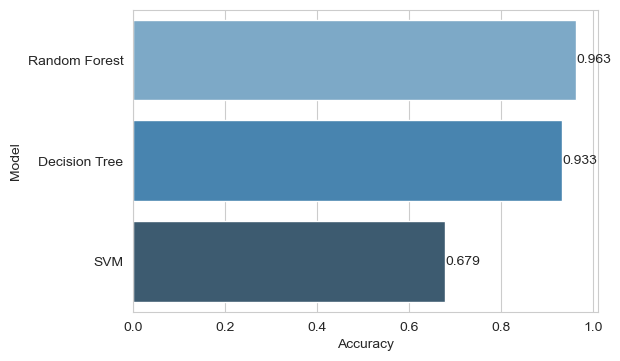

In [130]:
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

# F1 Score Comparison

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___